[View in Colaboratory](https://colab.research.google.com/github/TravelingEngineer/Sandbox/blob/master/Autoencoder_reconstruction_of_MNIST.ipynb)

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

# size of encoded representations
encoding_dim = 32 #32 floats -> compression factor 24.5, w/ input 784 floats

# input placeholder
input_img = Input(shape=(784,))
# "encoded" is representation of input
#encoded = Dense(encoding_dim, activation='relu')(input_img)

#dense layer with regularizer (sparsity constraint)
encoded = Dense(encoding_dim, activation='relu',
               activity_regularizer=regularizers.l1(10e-5))(input_img)
# "decoded" is lossy reconstruction of input
decoded = Dense(784, activation='sigmoid')(encoded)

#this model maps an input to reconstruction represenation
autoencoder = Model(input_img,decoded)
#this model maps an input to encoded represenation
encoder = Model(input_img,encoded)
#create a placeholder for encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
#create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

Using TensorFlow backend.


In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
from keras.datasets import mnist 
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data() 

#normalize data
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

11493376/11490434 [==============================] - 7s 1us/step
(60000, 784)
(10000, 784)


In [4]:
#training for 50 epochs
autoencoder.fit(x_train, x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.6731 - val_loss: 0.6484
Epoch 2/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.6283 - val_loss: 0.6090
Epoch 3/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.4531 - val_loss: 0.4457
Epoch

In [0]:
#encode and decode some digits
#note use test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

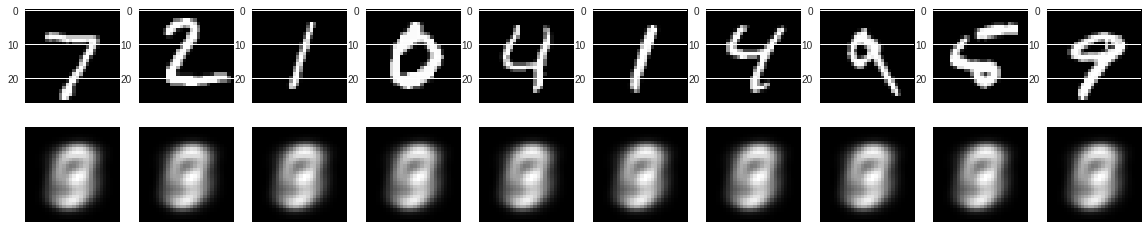

In [6]:
import matplotlib.pyplot as plt
n=10 # how many digits to display
plt.figure(figsize=(20,4))
for i in range(n):
    #display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    
    #display reconstruction
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()